In [75]:
import pandas as pd
import sqlite3
from pathlib import Path
import matplotlib.pyplot as plt
from func_auxiliares.config import DB_PATH

conn=sqlite3.connect(str(DB_PATH))
df=pd.read_sql_query(
    "Select año, crecimiento from tasa_crecimiento_pib", conn
)
df

,año,crecimiento
0,1951,7.28
1,1952,3.81
2,1953,-9.89
3,1954,2.27
4,1955,4.54
...,...,...
69,2020,-8.74
70,2021,6.11
71,2022,3.74
72,2023,2.00


In [76]:
# Elige el tamaño de ventana (número de años)
window = 5  # por ejemplo, 5 años

# 1. Media móvil centrada
df['rolling_mean'] = df['crecimiento'] \
    .rolling(window=window, center=True) \
    .mean()

# 2. Desviación estándar móvil centrada
df['rolling_std'] = df['crecimiento'] \
    .rolling(window=window, center=True) \
    .std()
print(df[['año','crecimiento','rolling_std']].to_string())

     año  crecimiento  rolling_std
0   1951         7.28          NaN
1   1952         3.81          NaN
2   1953        -9.89     6.675685
3   1954         2.27     6.429636
4   1955         4.54     5.865000
5   1956        -5.67     4.312352
6   1957        -3.31     4.145338
7   1958         2.35     4.636278
8   1959        -1.38     3.621054
9   1960         6.02     3.037241
10  1961         2.15     3.284075
11  1962         5.73     1.656342
12  1963         6.03     1.844134
13  1964         4.46     1.267261
14  1965         6.90     2.124154
15  1966         7.83     2.155767
16  1967         2.45     2.084162
17  1968         6.44     1.984356
18  1969         5.15     1.466414
19  1970         5.32     0.609524
20  1971         4.90     0.702282
21  1972         5.80     0.702282
22  1973         6.68     0.812945
23  1974         5.15     0.627120
24  1975         6.60     1.053741
25  1976         6.10     1.329560
26  1977         4.21     1.965363
27  1978         3.3

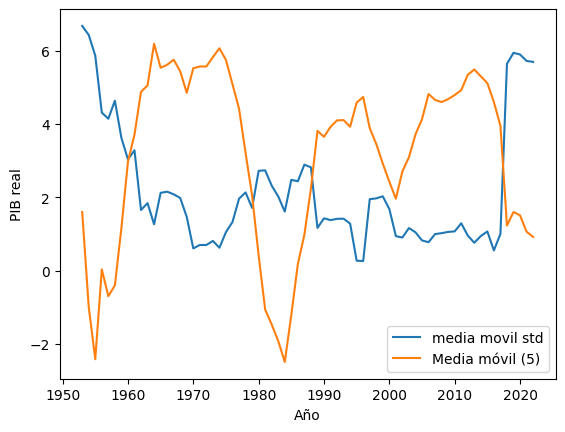

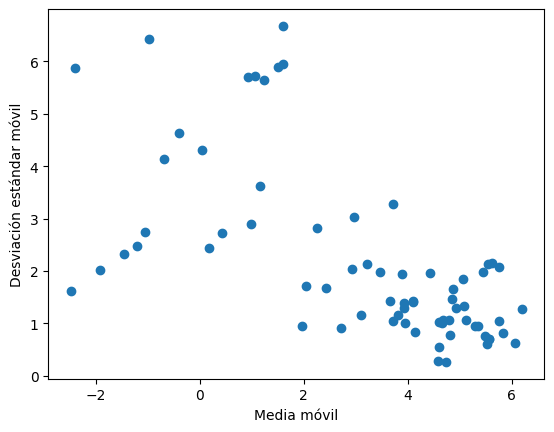

Correlación entre media y dispersión: -0.640


In [79]:
import matplotlib.pyplot as plt

# Serie original + media móvil
plt.figure()
plt.plot(df['año'], df['rolling_std'], label='media movil std')
plt.plot(df['año'], df['rolling_mean'],    label=f'Media móvil ({window})')
plt.xlabel('Año')
plt.ylabel('PIB real')
plt.legend()
plt.show()

# Dispersión: media vs std móvil
plt.figure()
plt.scatter(df['rolling_mean'], df['rolling_std'])
plt.xlabel('Media móvil')
plt.ylabel('Desviación estándar móvil')
plt.show()

# Opcional: cuantificar correlación
corr = df[['rolling_mean','rolling_std']].corr().iloc[0,1]
print(f"Correlación entre media y dispersión: {corr:.3f}")


In [71]:
import numpy as np
import pandas as pd

np.random.seed(0)
t = np.arange(1,101)
yA = 10 + np.random.normal(scale=1, size=100)
yB = 10 + np.random.normal(scale=t/10, size=100)

df = pd.DataFrame({
    'time': t,
    'A': yA,
    'B': yB
})
window = 20
df['std_A'] = df['A'].rolling(window=window, center=True).std()
df['std_B'] = df['B'].rolling(window=window, center=True).std()
df[60:90]

,time,A,B,std_A,std_B
60,61,9.327540,6.962002,0.654278,6.366517
61,62,9.640447,21.963099,0.690955,6.550350
62,63,9.186854,15.981351,0.679155,6.235810
63,64,8.273717,10.560328,0.753946,6.341532
64,65,10.177426,2.034669,0.757512,6.355657
65,66,9.598219,15.572796,0.770576,6.597337
66,67,8.369802,3.298557,0.759683,6.648079
67,68,10.462782,-0.504443,0.764886,6.628483
68,69,9.092702,18.197406,0.750868,6.590071
69,70,10.051945,12.218598,0.748789,6.464398
